# Cyclone preheater ANALYSIS - Mukhilan.A.M

In [1]:
#Importing Libraries for further Analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
data= pd.read_csv("preprocessed_data.csv")
data = data.drop(data.columns[0], axis=1)

In [3]:
data.head() #Retreiving the first four rows after preprocessing the data

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


In [4]:
data['time'] = pd.to_datetime(data['time']) #Checking whether any anomalies(string or object) are present or not
data.dtypes

time                        datetime64[ns]
Cyclone_Inlet_Gas_Temp             float64
Cyclone_Material_Temp              float64
Cyclone_Outlet_Gas_draft           float64
Cyclone_cone_draft                 float64
Cyclone_Gas_Outlet_Temp            float64
Cyclone_Inlet_Draft                float64
dtype: object

**Observation-5**: No datatype is present other than Numerical and Datetime for further analysis.

# Feature Engineering

In [5]:
data1= data.copy() #Copying the 'data' dataframe to 'data1'
data1.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39


## Adding day, month and year to obtain further insights

In [6]:
data1['day']= data1['time'].dt.day
data1['month']= data1['time'].dt.month
data1['year']= data1['time'].dt.year

In [7]:
data1.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,day,month,year
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1,1,2017
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1,1,2017
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1,1,2017
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1,1,2017
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1,1,2017


## Adding 'season' feature

In [8]:
data1['time'] = pd.to_datetime(data1['time'])

# Define a function to map months to seasons
def get_season(month):
    if month in [12, 1, 2]: #Months like December, January and February are the Winter Season
        return 'Winter'
    elif month in [6, 7, 8]: #Months like June, July and August are the Monsoon Season
        return 'Rainy'
    else:
        return 'Summer'      #Rest of the months I am considering as Summer

# Apply the function to create the 'season' column
data1['season'] = data1['time'].dt.month.apply(get_season)

In [9]:
data1.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,day,month,year,season
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1,1,2017,Winter
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1,1,2017,Winter
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1,1,2017,Winter
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1,1,2017,Winter
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1,1,2017,Winter


## Adding 'Week' number for observation on weekly basis

In [10]:
data1['weekday'] = data1['time'].dt.day_name()

In [11]:
data1.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,day,month,year,season,weekday
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1,1,2017,Winter,Sunday
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1,1,2017,Winter,Sunday
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1,1,2017,Winter,Sunday
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1,1,2017,Winter,Sunday
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1,1,2017,Winter,Sunday


In [12]:
data1.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft', 'day', 'month',
       'year', 'season', 'weekday'],
      dtype='object')

In [5]:
def checknum(a):
    if a%2==0:
        print("even")
    else:
        print("odd")


checknum(4)

even


## Cyclic Features

In [13]:
data1['hour_of_day'] = data1['time'].dt.hour
data1['day_of_year'] = data1['time'].dt.dayofyear

In [14]:
data1.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,day,month,year,season,weekday,hour_of_day,day_of_year
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1,1,2017,Winter,Sunday,0,1
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1,1,2017,Winter,Sunday,0,1
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1,1,2017,Winter,Sunday,0,1
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1,1,2017,Winter,Sunday,0,1
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1,1,2017,Winter,Sunday,0,1


In [15]:
data1['date'] = data1['time'].dt.date

In [16]:
data1.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,day,month,year,season,weekday,hour_of_day,day_of_year,date
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1,1,2017,Winter,Sunday,0,1,2017-01-01
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1,1,2017,Winter,Sunday,0,1,2017-01-01
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1,1,2017,Winter,Sunday,0,1,2017-01-01
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1,1,2017,Winter,Sunday,0,1,2017-01-01
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1,1,2017,Winter,Sunday,0,1,2017-01-01


In [17]:
data1['Time'] = data1['time'].dt.strftime('%H:%M')

In [18]:
data1.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,day,month,year,season,weekday,hour_of_day,day_of_year,date,Time
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,1,1,2017,Winter,Sunday,0,1,2017-01-01,00:00
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,1,1,2017,Winter,Sunday,0,1,2017-01-01,00:05
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,1,1,2017,Winter,Sunday,0,1,2017-01-01,00:10
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,1,1,2017,Winter,Sunday,0,1,2017-01-01,00:15
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,1,1,2017,Winter,Sunday,0,1,2017-01-01,00:20


In [19]:
data1.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft', 'day', 'month',
       'year', 'season', 'weekday', 'hour_of_day', 'day_of_year', 'date',
       'Time'],
      dtype='object')

## Adding "time_category" column consists (morning, afternoon, evening and night)

In [20]:
def get_time_category(time):
    hour = time.hour
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

# Convert 'time' column to datetime type
data['time'] = pd.to_datetime(data['time'])

# Apply the function to create the 'time_category' column
data['time_category'] = data['time'].apply(get_time_category)

In [21]:
data.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,time_category
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,Night
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,Night
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,Night
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,Night
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,Night


#Data Visualization

## Outlier Detection

In [22]:
data.head()

,time,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft,time_category
0,2017-01-01 00:00:00,867.63,910.42,-189.54,-186.04,852.13,-145.90,Night
1,2017-01-01 00:05:00,879.23,918.14,-184.33,-182.10,862.53,-149.76,Night
2,2017-01-01 00:10:00,875.67,924.18,-181.26,-166.47,866.06,-145.01,Night
3,2017-01-01 00:15:00,875.28,923.15,-179.15,-174.83,865.85,-142.82,Night
4,2017-01-01 00:20:00,891.66,934.26,-178.32,-173.72,876.06,-143.39,Night


In [23]:
data.columns

Index(['time', 'Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
       'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
       'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft', 'time_category'],
      dtype='object')

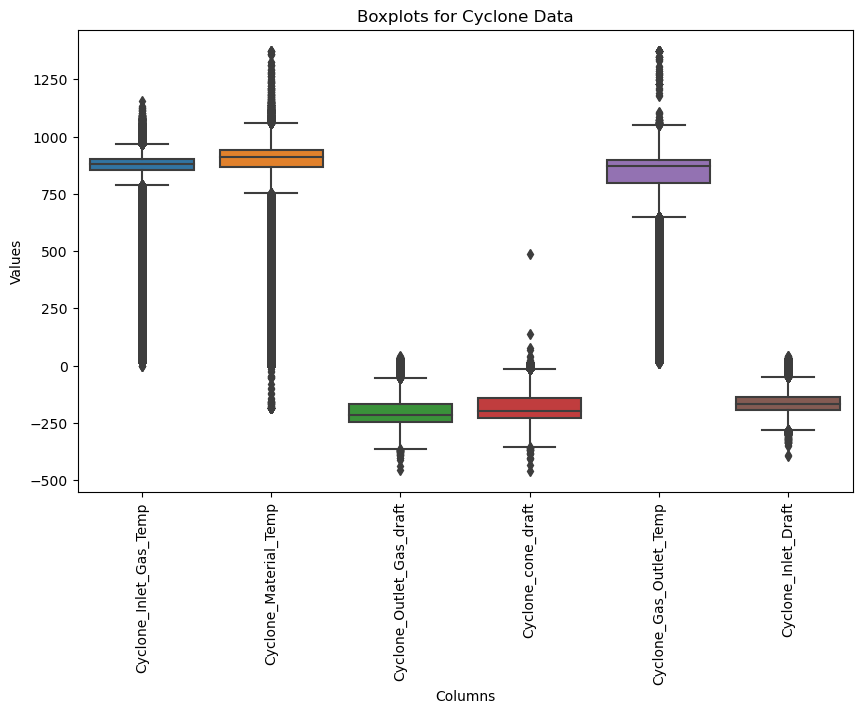

In [24]:
import seaborn as sns
subset_data = data[['Cyclone_Inlet_Gas_Temp', 'Cyclone_Material_Temp',
                   'Cyclone_Outlet_Gas_draft', 'Cyclone_cone_draft',
                   'Cyclone_Gas_Outlet_Temp', 'Cyclone_Inlet_Draft']]

# Reshape the DataFrame for plotting
melted_data = pd.melt(subset_data)

# Set the figure size
plt.figure(figsize=(10, 6))

# Create boxplots using seaborn
sns.boxplot(x='variable', y='value', data=melted_data)

# Set labels and title
plt.xlabel('Columns')
plt.ylabel('Values')
plt.title('Boxplots for Cyclone Data')

# Rotate x-axis labels for better visibility
plt.xticks(rotation=90)

# Show the plot
plt.show()

In [25]:
subset_data.describe().round(2)

,Cyclone_Inlet_Gas_Temp,Cyclone_Material_Temp,Cyclone_Outlet_Gas_draft,Cyclone_cone_draft,Cyclone_Gas_Outlet_Temp,Cyclone_Inlet_Draft
count,377719.00,377719.00,377719.00,377719.00,377719.00,377719.00
mean,726.03,749.40,-177.45,-164.25,714.46,-141.02
std,329.75,352.07,99.38,90.31,326.39,77.79
min,0.00,-185.00,-456.66,-459.31,13.79,-396.37
25%,855.88,867.07,-247.15,-226.73,799.10,-193.45
50%,882.32,913.23,-215.08,-198.43,871.38,-169.35
75%,901.08,943.58,-169.25,-142.37,899.23,-135.52
max,1157.63,1375.00,40.27,488.86,1375.00,41.64


In [26]:
for column in subset_data.columns:
    # Calculate the lower and upper whiskers
    whiskers = data[column].describe()[['25%', '75%']].values
    iqr = whiskers[1] - whiskers[0]
    lower_whisker = whiskers[0] - 1.5 * iqr
    upper_whisker = whiskers[1] + 1.5 * iqr

    # Count the values outside minima and maxima
    count_below_minima = (data[column] < lower_whisker).sum()
    count_above_maxima = (data[column] > upper_whisker).sum()

    print("Column:", column)
    print("Values below minima:", count_below_minima)
    print("Values above maxima:", count_above_maxima)
    print()

Column: Cyclone_Inlet_Gas_Temp
Values below minima: 81914
Values above maxima: 3919

Column: Cyclone_Material_Temp
Values below minima: 79169
Values above maxima: 639

Column: Cyclone_Outlet_Gas_draft
Values below minima: 30
Values above maxima: 81993

Column: Cyclone_cone_draft
Values below minima: 20
Values above maxima: 75235

Column: Cyclone_Gas_Outlet_Temp
Values below minima: 80644
Values above maxima: 118

Column: Cyclone_Inlet_Draft
Values below minima: 127
Values above maxima: 82364



#Obtaining Insights

### Power BI was utilized to visualize the most crucial insights, as it proved to be a versatile and efficient tool compared to Python. Its capabilities enabled us to obtain a comprehensive and detailed understanding of the data, revealing numerous valuable insights. The visualizations created in Power BI facilitated a more thorough analysis and interpretation of the data, leading to a deeper exploration of the underlying patterns and trends.
